## **Módulo Matéria 06** - Modelo de Classificação

## Regressão Linear Múltipla

### 396 P-Value
<h1>P-value</h1><h2>O que é</h2><ul><li>Avalia o quão bem os dados da amostra apoiam a hipótese nula</li><li>Mede a compatibilidade dos dados com a hipótese nula</li><li>Mede a probabilidade do efeito observado ser verdadeiro se a hipótese nula for verdadeira</li></ul><h2>Hipótese nula</h2><ul><li>Hipótese de que não há alteração quando uma variável se movimenta</li><li>Ex: Pessoas que tomam vacina não tem nenhuma reação</li><li>O objetivo é descartar essa hipótese</li></ul><h2>Regressão linear</h2><ul><li>Uma variável influencia a outra</li><li>Quando uma aumenta, a outra aumenta/diminui pelo coeficiente</li></ul><h2>Interpretação do p-value</h2><ul><li>p-value ALTO: valores prováveis dado a hipótese nula verdadeira (nada acontece)</li><li>p-value BAIXO: valores improváveis dado a hipótese nula verdadeira (há influência)</li><li>p-value baixo -&gt; evidência para rejeitar a hipótese nula</li></ul><h2>Exemplo</h2><ul><li>p-value de 0.000000 para ano 2015 -&gt; muito baixo</li><li>Indica que há influência de 2015 sobre 2016 (variável target)</li><li>Sugere correlação linear entre as variáveis</li></ul>

### 397 Regressão Linear Múltipla
<h1>Regressão Linear Múltipla</h1><h2>Conceito</h2><ul><li>Modelo com mais de uma variável explicativa (X) tentando prever uma variável resposta (Y)</li><li>Cada variável X tem um coeficiente (B) diferente</li><li>Aplicações:<ul><li>Prever limite de cartão de crédito com base em renda, tempo de relacionamento, idade</li><li>Prever percentual de matrículas em escola com base em notas, idade e renda familiar</li></ul></li></ul><h2>Fórmula</h2><pre><code>Y = B0 + B1X1 + B2X2 + ... + BnXn</code></pre><h2>Multicolinearidade</h2><ul><li>Correlação entre as variáveis explicativas X</li><li>Dificulta isolar o efeito de cada X na Y</li><li>Soluções:<ul><li>Retirar variáveis com alto p-value</li><li>Métodos de seleção de variáveis (backward, forward, stepwise)</li></ul></li></ul><h2>Métodos de Seleção de Variáveis</h2><ul><li>Backward: começa com todas as variáveis e vai retirando de trás pra frente</li><li>Forward: começa com nenhuma variável e vai adicionando</li><li>Stepwise: mescla backward e forward</li></ul><h2>OLS (Ordinary Least Squares)</h2><ul><li>Encontra os coeficientes que minimizam os resíduos ao quadrado</li><li>Parâmetros:<ul><li>R2: variabilidade explicada pelo modelo</li><li>R2 Ajustado: ajusta R2 para mais variáveis</li><li>Erro padrão: acurácia dos coeficientes</li><li>Intervalo de confiança: intervalo dos coeficientes com 95% de confiança</li></ul></li></ul><h2>Avaliação do Modelo</h2><ul><li>Interpretar coeficientes</li><li>Interpretar R2 ajustado</li><li>Verificar p-values</li></ul>

### 398 Regressão Linear Múltipla - Prática

In [473]:
import pandas as pd
import numpy as np
import seaborn as sns

In [474]:
limite = pd.read_excel('Limite_Credito.xlsx', engine='openpyxl')
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


In [475]:
limite.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.066396,0.063227,0.064149,0.075883
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120
Salario,0.063227,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000


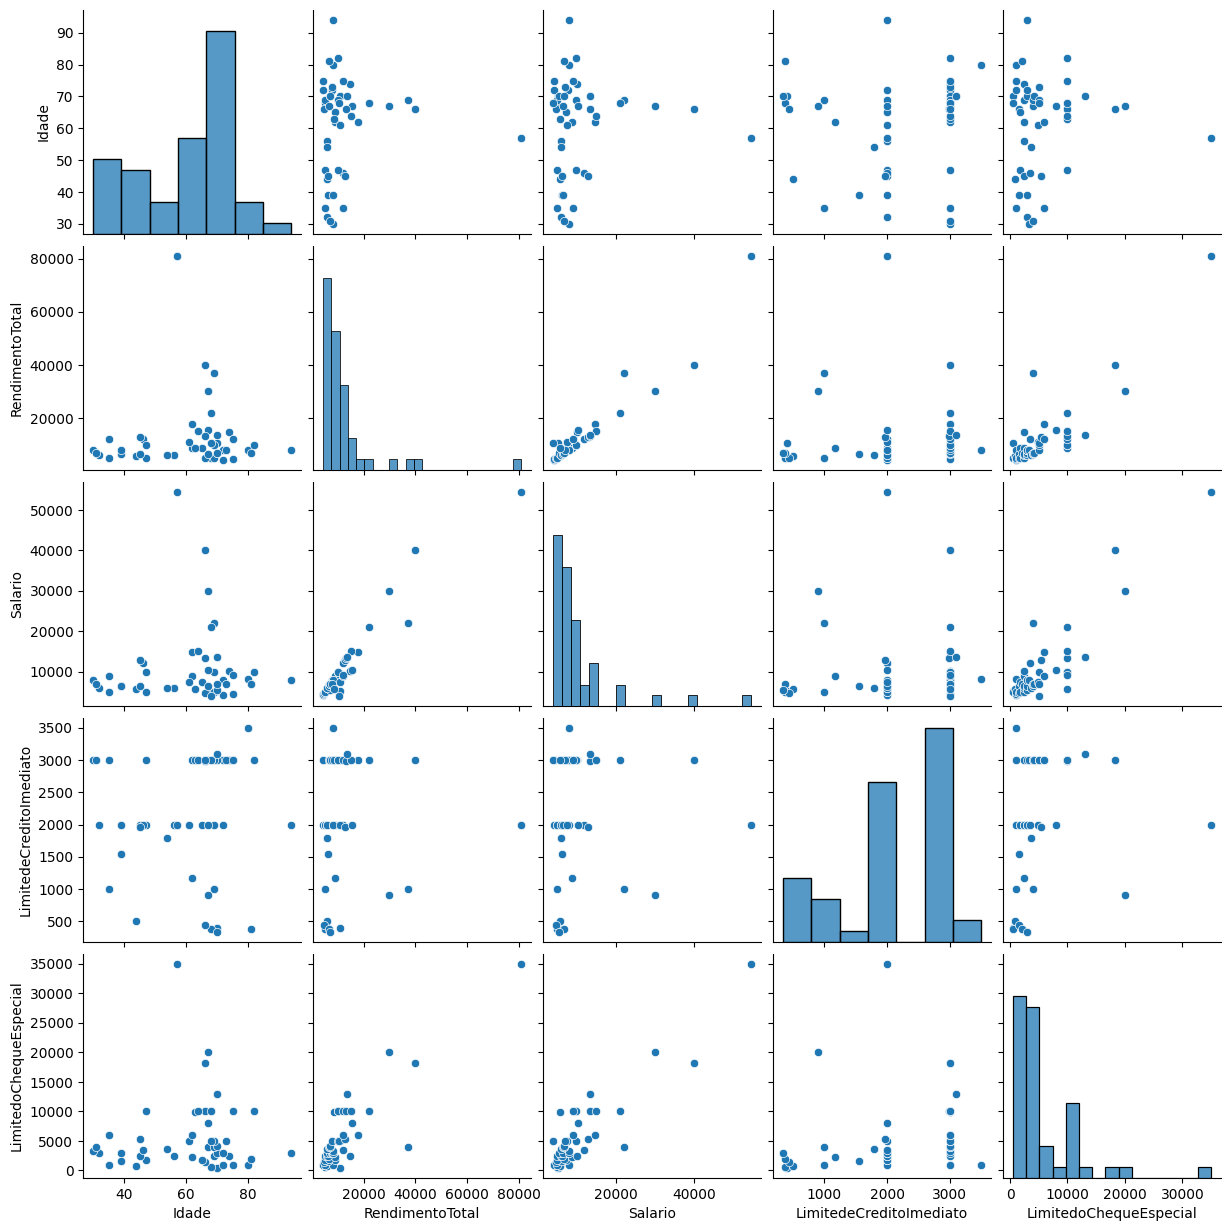

In [476]:
# Gráficos comparativos
sns.pairplot(limite);

In [477]:
# importando uma nova biblioteca modelo OLS
import statsmodels.formula.api as smf

In [478]:
# Adicionar ou remover variáveis 
# ~ trazer variáveis explicativas, separada pelo sinal de + e * igual e
function = "LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato"
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                     47.65
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           2.92e-15
Time:                            13:07:43   Log-Likelihood:                -445.61
No. Observations:                      48   AIC:                             901.2
Df Residuals:                          43   BIC:                             910.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [479]:
# Ajuste de modelo tirando Idade
function = "LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato"
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.803
Method:                     Least Squares   F-statistic:                     64.97
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           3.34e-16
Time:                            13:07:43   Log-Likelihood:                -445.62
No. Observations:                      48   AIC:                             899.2
Df Residuals:                          44   BIC:                             906.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [480]:
# Ajuste de modelo tirando Rendimento Total
function = "LimitedoChequeEspecial~+Salario+LimitedeCreditoImediato"
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           3.66e-17
Time:                            13:07:43   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### 399 Regressão Linear Múltipla - Exercício
<h1>Tema central: Regressão linear múltipla</h1><h2>Contexto</h2><ul><li>A escola DNC solicitou uma análise para prever seu lucro com base em:<ul><li>Investimento</li><li>Investimento em marketing</li><li>Gastos administrativos</li></ul></li></ul><h2>Objetivo</h2><ul><li>Fazer uma análise dos dados</li><li>Utilizar métodos de seleção de variáveis (backward, forward ou stepwise)</li><li>Adicionar ao modelo apenas variáveis explicativas com p-value &lt;= 5%</li></ul><h2>Desafio</h2><ul><li>Fazer a análise e o modelo solicitados pela escola DNC</li><li>Aplicar conhecimentos sobre regressão linear múltipla</li></ul><h2>Próximos passos</h2><ul><li>Aguarde o gabarito para verificar seu exercício</li></ul>

### 400 Regressão Linear Múltipla - Gabarito

In [481]:
import pandas as pd
import numpy as np
import seaborn as sns

In [482]:
lucro = pd.read_excel('Exercicio_Lucro.xlsx')
lucro.head()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


In [483]:
lucro.corr()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
Investimento,1.000000,0.661913,0.243497,0.896767
Investimento_Mkt,0.661913,1.000000,-0.046715,0.716677
Gastos_Administrativos,0.243497,-0.046715,1.000000,0.200720
Lucro,0.896767,0.716677,0.200720,1.000000


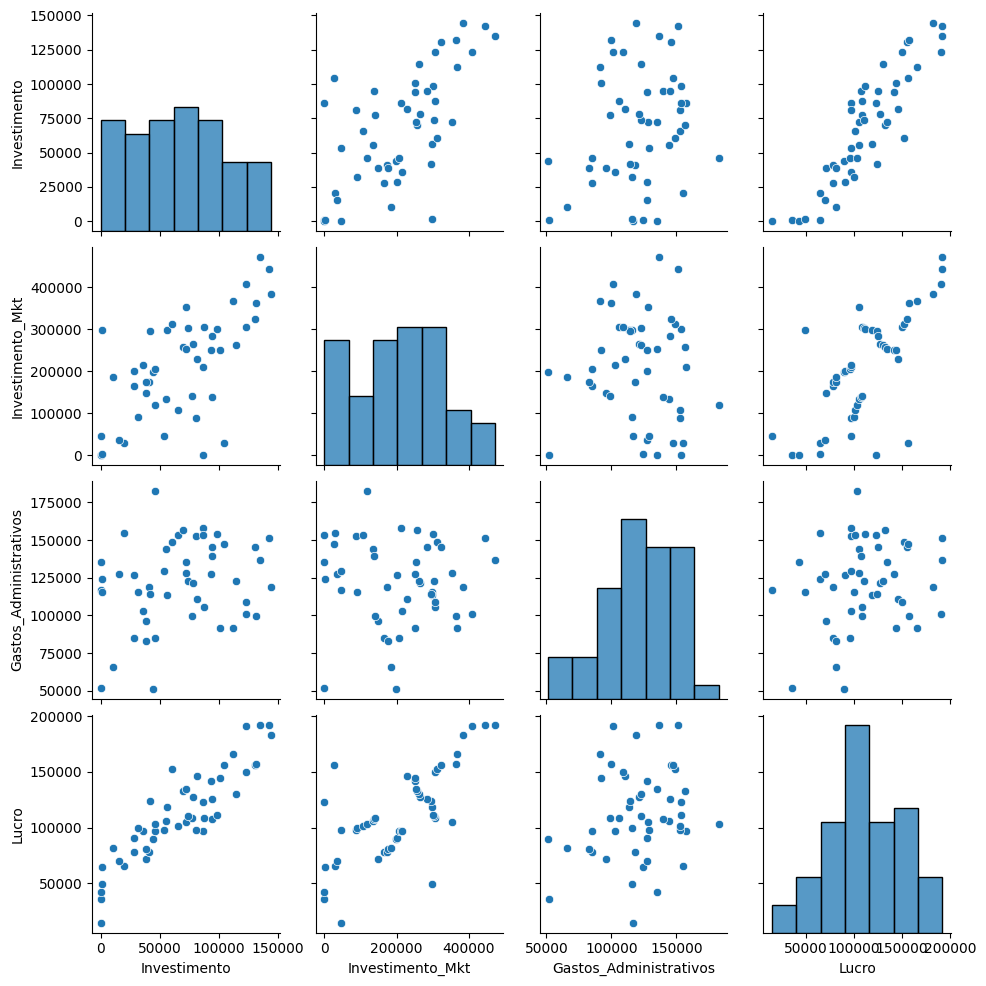

In [484]:
sns.pairplot(lucro);

In [485]:
import statsmodels.formula.api as smf
function = "Lucro~Investimento+Investimento_Mkt+Gastos_Administrativos"
model = smf.ols(formula=function, data=lucro).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     75.97
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           7.60e-18
Time:                        13:07:47   Log-Likelihood:                -556.05
No. Observations:                  50   AIC:                             1120.
Df Residuals:                      46   BIC:                             1128.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.21

In [486]:
import statsmodels.formula.api as smf
function = "Lucro~Investimento+Investimento_Mkt"
model = smf.ols(formula=function, data=lucro).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           7.01e-19
Time:                        13:07:47   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.758e+04   5004.534  

### 401 Variáveis Dummy Teórica
<h1>Variáveis Dummies</h1><h2>O que são variáveis dummies?</h2><ul><li>Variáveis indicadoras que representam variáveis categóricas ou qualitativas</li><li>Atribuem a presença (1) ou ausência (0) de uma característica</li></ul><h2>Por que usar variáveis dummies?</h2><ul><li>Os modelos de regressão linear só funcionam com variáveis quantitativas</li><li>As variáveis dummies transformam variáveis categóricas em numéricas para que os modelos entendam</li></ul><h2>Exemplo</h2><ul><li><p>Variável categórica: Escolaridade (Fundamental/Médio, Superior, Pós)</p></li><li><p>Variáveis dummies criadas:</p><ul><li>Escolaridade_FundamentalMédio (1 se for Fundamental/Médio, 0 caso contrário)</li><li>Escolaridade_Superior (1 se for Superior, 0 caso contrário)</li><li>Escolaridade_Pós (1 se for Pós, 0 caso contrário)</li></ul></li></ul><h2>Considerações</h2><ul><li>Necessário para modelos de regressão linear, mas não para algoritmos de Machine Learning</li><li>Próxima aula mostrará implementação no Pandas</li></ul>

### 402 Variáveis Dummy Prática

In [487]:
import pandas as pd
import numpy as np
import seaborn as sns

In [488]:
limite = pd.read_excel("Limite_Credito(2).xlsx")
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


In [489]:
# Verificando Dummies 
# Transformando em Booleano
limite=pd.get_dummies(limite, prefix=["Escolaridade"])
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos
0,70,10736,5214,400,500,True,False
1,68,5000,5000,380,600,True,False
2,44,5800,5800,500,800,True,False
3,72,4300,4300,2000,1000,True,False
4,75,4400,4400,3000,1000,True,False


In [490]:
from sklearn.preprocessing import OneHotEncoder

In [491]:
encoder = OneHotEncoder(drop='if_binary')
encoder

OneHotEncoder(drop='if_binary')

In [492]:
categorical_columns = limite.select_dtypes(exclude='number').columns

In [493]:
encoder.fit(limite[categorical_columns])

OneHotEncoder(drop='if_binary')

In [494]:
encoder.categories_

[array([False,  True]), array([False,  True])]

In [495]:
encoder.drop_idx_

array([0, 0], dtype=object)

In [496]:
encoder.feature_names_in_

array(['Escolaridade_Fundamental_Medio', 'Escolaridade_Superior_Pos'],
      dtype=object)

In [497]:
encoder.get_feature_names_out()

array(['Escolaridade_Fundamental_Medio_True',
       'Escolaridade_Superior_Pos_True'], dtype=object)

In [498]:
encoder.transform(limite[categorical_columns]).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [499]:
pd.DataFrame(
   encoder.transform(limite[categorical_columns]).toarray(),
   columns=encoder.get_feature_names_out()
)

,Escolaridade_Fundamental_Medio_True,Escolaridade_Superior_Pos_True
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [500]:
limite_cat = limite.copy()

limite_cat[categorical_columns] = limite_cat[categorical_columns].astype('category')
limite_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Idade                           48 non-null     int64   
 1   RendimentoTotal                 48 non-null     int64   
 2   Salario                         48 non-null     int64   
 3   LimitedeCreditoImediato         48 non-null     int64   
 4   LimitedoChequeEspecial          48 non-null     int64   
 5   Escolaridade_Fundamental_Medio  48 non-null     category
 6   Escolaridade_Superior_Pos       48 non-null     category
dtypes: category(2), int64(5)
memory usage: 2.3 KB


In [501]:
{col:dict(enumerate(limite_cat['Escolaridade_Fundamental_Medio'].cat.categories))for col in categorical_columns}

{'Escolaridade_Fundamental_Medio': {0: False, 1: True},
 'Escolaridade_Superior_Pos': {0: False, 1: True}}

In [502]:
limite_cat['Escolaridade_Fundamental_Medio'].cat.codes

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    0
30    1
31    1
32    1
33    0
34    0
35    0
36    0
37    1
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
dtype: int8

In [503]:
# Modificando colunas
limite_cat[categorical_columns]=limite_cat[categorical_columns].apply(lambda x: x.cat.codes)

In [504]:
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos
0,70,10736,5214,400,500,True,False
1,68,5000,5000,380,600,True,False
2,44,5800,5800,500,800,True,False
3,72,4300,4300,2000,1000,True,False
4,75,4400,4400,3000,1000,True,False


In [505]:
limite_cat.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos
Idade,1.000000,0.066396,0.063227,0.064149,0.075883,-0.110892,0.110892
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191
Salario,0.063227,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310
Escolaridade_Fundamental_Medio,-0.110892,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000
Escolaridade_Superior_Pos,0.110892,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000


In [506]:
import statsmodels.formula.api as smf

In [507]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos'
model = smf.ols(formula=function, data=limite_cat).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.830
Method:                     Least Squares   F-statistic:                     46.89
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           4.07e-16
Time:                            13:07:47   Log-Likelihood:                -441.00
No. Observations:                      48   AIC:                             894.0
Df Residuals:                          42   BIC:                             905.2
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [508]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos'
model = smf.ols(formula=function, data=limite_cat).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.834
Method:                     Least Squares   F-statistic:                     59.99
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           4.92e-17
Time:                            13:07:47   Log-Likelihood:                -441.01
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          43   BIC:                             901.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [509]:
# Tirando o Intercept
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos-1'
model = smf.ols(formula=function, data=limite_cat).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.834
Method:                     Least Squares   F-statistic:                     59.99
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           4.92e-17
Time:                            13:07:47   Log-Likelihood:                -441.01
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          43   BIC:                             901.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [510]:
# Tirando o Intercept
function = 'LimitedoChequeEspecial~Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos-1'
model = smf.ols(formula=function, data=limite_cat).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.842
Model:                                OLS   Adj. R-squared:                  0.831
Method:                     Least Squares   F-statistic:                     77.92
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           1.23e-17
Time:                            13:07:47   Log-Likelihood:                -442.00
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          44   BIC:                             899.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [511]:
function = 'LimitedoChequeEspecial~Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio-1'
model = smf.ols(formula=function, data=limite_cat).fit() 
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.915
Model:                                OLS   Adj. R-squared (uncentered):              0.909
Method:                     Least Squares   F-statistic:                              160.9
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):                    4.57e-24
Time:                            13:07:47   Log-Likelihood:                         -442.01
No. Observations:                      48   AIC:                                      890.0
Df Residuals:                          45   BIC:                                      895.6
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                                     coef    std err          t      P>|t|      

### 403 Variáveis Dummy Exercício
<h1>Tema central: Desafio de transformação de variáveis categóricas em variáveis DUMMIES para modelo de regressão</h1><h2>Contexto</h2><ul><li>Galera recebeu um novo desafio relacionado a variáveis DUMMIES</li><li>Banco que solicitou modelo de limite de crédito incluiu novas variáveis categóricas no dataset:<ul><li>Escolaridade</li><li>Gênero</li><li>Estado dos clientes</li></ul></li></ul><h2>Objetivo</h2><ul><li>Fazer transformações necessárias nas novas variáveis categóricas em variáveis DUMMIES</li><li>Rodar modelo de regressão linear múltipla (OLS)</li><li>Ajustar o modelo baseado no P-Value até que ele fique bem ajustado</li></ul><h2>Passos</h2><ol><li>Pegar as novas variáveis categóricas</li><li>Transformá-las em variáveis DUMMIES</li><li>Rodar modelo OLS com as novas variáveis</li><li>Analisar output do modelo e P-Values</li><li>Fazer ajustes necessários (ex: remover variáveis não significativas)</li><li>Rodar modelo novamente e repetir passos até modelo bem ajustado</li></ol><h2>Considerações finais</h2><ul><li>Desafio envolve habilidades de:<ul><li>Transformação de dados</li><li>Regressão linear múltipla</li><li>Interpretação de outputs</li><li>Refinamento iterativo de modelos</li></ul></li><li>Importante seguir modelo inicial da galera</li><li>Boa sorte no desafio!</li></ul>

### 404 Variáveis Dummy Gabarito
<h1>Análise de modelo de regressão linear</h1><h2>Importando bibliotecas e dados</h2><ul><li>Importa biblioteca Pandas</li><li>Lê arquivo Excel com dados fictícios &quot;limite-credito-dummy.xlsx&quot;</li></ul><h2>Pré-processamento dos dados</h2><ul><li>Converte variáveis categóricas em dummies usando função getDummies()<ul><li>Escolaridade</li><li>Gênero</li><li>Região</li></ul></li></ul><h2>Análise de correlação</h2><ul><li>Analisa correlação entre variáveis</li></ul><h2>Modelo de Regressão Linear (OLS)</h2><ul><li>Importa biblioteca Statsmodels</li><li>Define variável target: limite cheque especial</li><li>Utiliza método backward elimination</li><li>Avalia p-values para decidir quais variáveis permanecem</li><li>Remove variáveis com p-value &gt; 5% iterativamente:<ul><li>Idade</li><li>Limite crédito imediato</li><li>Escolaridade fundamental</li><li>Escolaridade média</li><li>Escolaridade superior</li><li>Rendimento total</li></ul></li></ul><h2>Resultados</h2><ul><li>Modelo final<ul><li>Nenhuma variável com p-value &gt; 5%</li><li>Nível de explicabilidade: 87%</li><li>Variáveis explicativas representam variação da variável target</li></ul></li></ul>

In [512]:
import pandas as pd


In [513]:
limite = pd.read_excel("Limite_Credito_Dummy.xlsx")
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [514]:
limite = pd.get_dummies(data=limite, columns=["Escolaridade","Gênero","Região"], prefix=["Escolaridade","Gênero","Região"])
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Gênero_RJ,Gênero_SP,Região_F,Região_M
0,70,10736,5214,400,500,True,False,True,False,True,False
1,68,5000,5000,380,600,True,False,True,False,True,False
2,44,5800,5800,500,800,True,False,True,False,True,False
3,72,4300,4300,2000,1000,True,False,True,False,True,False
4,75,4400,4400,3000,1000,True,False,True,False,True,False


In [515]:
from sklearn.preprocessing import OneHotEncoder

In [516]:
encoder = OneHotEncoder(drop='if_binary')
encoder

OneHotEncoder(drop='if_binary')

In [517]:
categorical_columns = limite.select_dtypes(exclude='number').columns

In [518]:
encoder.fit(limite[categorical_columns])


OneHotEncoder(drop='if_binary')

In [519]:
encoder.categories_

[array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True])]

In [520]:
encoder.drop_idx_

array([0, 0, 0, 0, 0, 0], dtype=object)

In [521]:
encoder.feature_names_in_

array(['Escolaridade_Fundamental_Medio', 'Escolaridade_Superior_Pos',
       'Gênero_RJ', 'Gênero_SP', 'Região_F', 'Região_M'], dtype=object)

In [522]:
encoder.transform(limite[categorical_columns]).toarray()

array([[1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1.],
       [1.

In [523]:
pd.DataFrame(
   encoder.transform(limite[categorical_columns]).toarray(),
   columns=encoder.get_feature_names_out()
)


,Escolaridade_Fundamental_Medio_True,Escolaridade_Superior_Pos_True,Gênero_RJ_True,Gênero_SP_True,Região_F_True,Região_M_True
0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0,1.0,0.0


In [524]:
limite_cat = limite.copy()

limite_cat[categorical_columns] = limite_cat[categorical_columns].astype('category')
limite_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Idade                           48 non-null     int64   
 1   RendimentoTotal                 48 non-null     int64   
 2   Salario                         48 non-null     int64   
 3   LimitedeCreditoImediato         48 non-null     int64   
 4   LimitedoChequeEspecial          48 non-null     int64   
 5   Escolaridade_Fundamental_Medio  48 non-null     category
 6   Escolaridade_Superior_Pos       48 non-null     category
 7   Gênero_RJ                       48 non-null     category
 8   Gênero_SP                       48 non-null     category
 9   Região_F                        48 non-null     category
 10  Região_M                        48 non-null     category
dtypes: category(6), int64(5)
memory usage: 2.8 KB


In [525]:
{col:dict(enumerate(limite_cat['Escolaridade_Fundamental_Medio'].cat.categories))for col in categorical_columns}

{'Escolaridade_Fundamental_Medio': {0: False, 1: True},
 'Escolaridade_Superior_Pos': {0: False, 1: True},
 'Gênero_RJ': {0: False, 1: True},
 'Gênero_SP': {0: False, 1: True},
 'Região_F': {0: False, 1: True},
 'Região_M': {0: False, 1: True}}

In [526]:
limite_cat['Escolaridade_Fundamental_Medio'].cat.codes

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    0
30    1
31    1
32    1
33    0
34    0
35    0
36    0
37    1
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
dtype: int8

In [527]:
# Modificando colunas
limite_cat[categorical_columns]=limite_cat[categorical_columns].apply(lambda x: x.cat.codes)


In [528]:
limite=limite_cat
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Gênero_RJ,Gênero_SP,Região_F,Região_M
0,70,10736,5214,400,500,1,0,1,0,1,0
1,68,5000,5000,380,600,1,0,1,0,1,0
2,44,5800,5800,500,800,1,0,1,0,1,0
3,72,4300,4300,2000,1000,1,0,1,0,1,0
4,75,4400,4400,3000,1000,1,0,1,0,1,0


In [529]:
limite.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Gênero_RJ,Gênero_SP,Região_F,Região_M
Idade,1.000000,0.239445,0.213186,0.057183,0.228117,-0.150088,0.150088,-0.196052,0.196052,-0.121217,0.121217
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191,-0.177798,0.177798,-0.406241,0.406241
Salario,0.213186,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479,-0.242621,0.242621,-0.424335,0.424335
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433,-0.001145,0.001145,-0.473326,0.473326
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310,-0.312566,0.312566,-0.591779,0.591779
Escolaridade_Fundamental_Medio,-0.150088,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000,0.237508,-0.237508,0.602464,-0.602464
Escolaridade_Superior_Pos,0.150088,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000,-0.237508,0.237508,-0.602464,0.602464
Gênero_RJ,-0.196052,-0.177798,-0.242621,-0.001145,-0.312566,0.237508,-0.237508,1.000000,-1.000000,-0.167248,0.167248
Gênero_SP,0.196052,0.177798,0.242621,0.001145,0.312566,-0.237508,0.237508,-1.000000,1.000000,0.167248,-0.167248
Região_F,-0.121217,-0.406241,-0.424335,-0.473326,-0.591779,0.602464,-0.602464,-0.167248,0.167248,1.000000,-1.000000


In [530]:
import statsmodels.formula.api as smf

In [531]:
function=("LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Gênero_RJ+Gênero_SP+Região_F+Região_M")
model = smf.ols(formula=function, data = limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           7.44e-17
Time:                            13:07:48   Log-Likelihood:                -434.21
No. Observations:                      48   AIC:                             884.4
Df Residuals:                          40   BIC:                             899.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [532]:
function=("LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Gênero_RJ+Gênero_SP+Região_F+Região_M")
model = smf.ols(formula=function, data = limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           9.97e-18
Time:                            13:07:48   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [533]:
function=("LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Superior_Pos+Gênero_RJ+Gênero_SP+Região_F+Região_M")
model = smf.ols(formula=function, data = limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           9.97e-18
Time:                            13:07:48   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [534]:
function=("LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade_Superior_Pos+Gênero_RJ+Gênero_SP+Região_F+Região_M")
model = smf.ols(formula=function, data = limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           1.39e-18
Time:                            13:07:48   Log-Likelihood:                -434.44
No. Observations:                      48   AIC:                             880.9
Df Residuals:                          42   BIC:                             892.1
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [535]:
function=("LimitedoChequeEspecial~Salario+Escolaridade_Superior_Pos+Gênero_RJ+Gênero_SP+Região_F+Região_M")
model = smf.ols(formula=function, data = limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.880
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     78.87
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           3.15e-19
Time:                            13:07:48   Log-Likelihood:                -435.33
No. Observations:                      48   AIC:                             880.7
Df Residuals:                          43   BIC:                             890.0
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [536]:
function=("LimitedoChequeEspecial~Salario+Gênero_RJ+Gênero_SP+Região_F+Região_M")
model = smf.ols(formula=function, data = limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           3.24e-20
Time:                            13:07:48   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [538]:
function=("LimitedoChequeEspecial~Salario+Gênero_RJ+Gênero_SP+Região_F+Região_M-1")
model = smf.ols(formula=function, data = limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Mon, 09 Sep 2024   Prob (F-statistic):           3.24e-20
Time:                            13:08:20   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salario     